In [8]:
# Importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.patches as mpatches
from numpy import average
import seaborn as sb
import datetime as dt
from collections import Counter

# called to counteract dark-mode Jupyter from swallowing axes &c.
plt.style.use('seaborn-whitegrid')

In [9]:
# Import the modified datasets
hourly = pd.read_csv('data/mod_data/hour_mod.csv')#, index_col='date_time')
daily = pd.read_csv('data/mod_data/day_mod.csv')#, index_col='date_time')


In [10]:
# Change the types of the columns
hourly = hourly.astype({'date_time': 'datetime64', 'season_name': 'category', 'weekday_name': 'category', 'weather_desc': 'category',
                         'daytime': 'category'})

daily = daily.astype({'date_time': 'datetime64', 'season_name': 'category', 'weekday_name': 'category', 'weather_desc': 'category'})

In [11]:
daily.columns

Index(['date_time', 'instant', 'date_day', 'season', 'year', 'month',
       'is_holiday', 'weekday', 'is_workday', 'weather', 'temp', 'temp_feel',
       'humidity', 'windspeed', 'casual', 'registered', 'total_riders',
       'season_name', 'weekday_name', 'weather_desc', 'date_int', 'cold',
       'hot', 'muggy'],
      dtype='object')

In [12]:
hourly.columns

Index(['date_time', 'instant', 'date_day', 'season', 'year', 'month', 'hour',
       'is_holiday', 'weekday', 'is_workday', 'weather', 'temp', 'temp_feel',
       'humidity', 'windspeed', 'casual', 'registered', 'total_riders',
       'hour_time', 'season_name', 'weekday_name', 'weather_desc', 'daytime',
       'daytime_code', 'cold', 'hot', 'muggy'],
      dtype='object')

<hr>

This was an idea that the number of daylight hours would influence the number of people cycling. I suppose it ties in with seasonality, so I have moved it to the supplemental Part 2 of the project.

In [6]:
# Define a function which returns the hours of daylight
# given the day of the year, from 0 to 365

# def hours_of_daylight(date, axis=23.44, latitude=38.85): # date, axial tilt of earth, latitude of Washington National Airport
#     """Compute the hours of daylight for the given date"""
#     diff = date - pd.datetime(2011, 1, 1)
#     day = diff.total_seconds() / 24. / 3600
#     day %= 365.25
#     m = 1. - np.tan(np.radians(latitude)) * np.tan(np.radians(axis) * np.cos(day * np.pi / 182.625))
#     m = max(0, min(m, 2))
#     return 24. * np.degrees(np.arccos(1 - m)) / 180.

# add this to our weekly data
#weekly['daylight'] = map(hours_of_daylight, weekly.index)
#daily['daylight'] = map(hours_of_daylight, daily.index)
#daily['daylight'] = daily.daylight.map(hours_of_daylight, enumerate(daily.index))
#hourly['year'] = hourly.year.map({0:2011, 1:2012}).astype('category')


<hr>

In [13]:
# useful things
days_of_week = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

In [41]:
# set categorical order
daily['weekday_name'] = pd.Categorical(daily['weekday_name'],
                                   categories=['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday'],
                                   ordered=True)
hourly['weekday_name'] = pd.Categorical(hourly['weekday_name'],
                                   categories=['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday'],
                                   ordered=True)
daily['season_name'] = pd.Categorical(daily['season_name'],
                                   categories=['spring', 'summer', 'autumn', 'winter'],
                                   ordered=True)
hourly['season_name'] = pd.Categorical(hourly['season_name'],
                                   categories=['spring', 'summer', 'autumn', 'winter'],
                                   ordered=True)

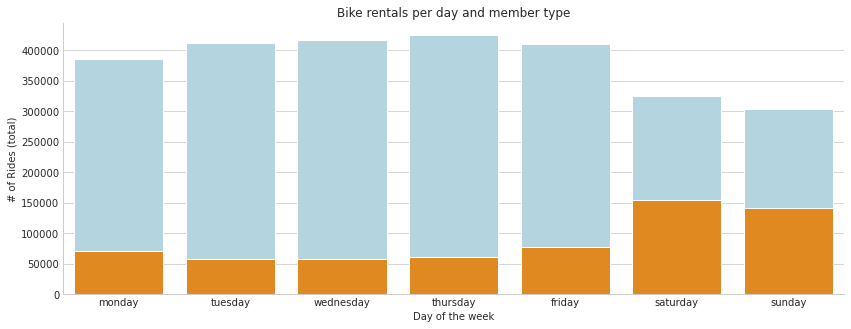

In [34]:
plt.figure(figsize=(14,5))#, dpi=128)
s1 = sb.barplot(x = 'weekday_name', y = 'registered', data = daily, estimator = sum, ci = None,  color = 'lightblue')#, order = days_of_week)
s2 = sb.barplot(x = 'weekday_name', y = 'casual', data = daily, estimator = sum, ci = None,  color = 'darkorange')#, order = days_of_week)

plt.title('Bike rentals per day and member type')
plt.ylabel('# of Rides (total)')

plt.xlabel('Day of the week')
sb.despine()

plt.savefig('graphs/dow_numrides_membertype.jpg', bbox_inches='tight')
plt.show()

In [17]:
# Mean number of riders for each hour of the days in a year
temp=hourly.join(hourly.groupby(['hour', 'weekday'])['total_riders'].mean(), on=['hour','weekday'], rsuffix='_avg')
temp

,date_time,instant,date_day,season,year,month,hour,is_holiday,weekday,is_workday,...,hour_time,season_name,weekday_name,weather_desc,daytime,daytime_code,cold,hot,muggy,total_riders_avg
0,2011-01-01 00:00:00,1,2011-01-01,1,2011,1,0,0,6,0,...,00:00:00,winter,saturday,clear,night,0,1,0,1,94.304762
1,2011-01-01 01:00:00,2,2011-01-01,1,2011,1,1,0,6,0,...,01:00:00,winter,saturday,clear,night,0,1,0,1,67.780952
2,2011-01-01 02:00:00,3,2011-01-01,1,2011,1,2,0,6,0,...,02:00:00,winter,saturday,clear,night,0,1,0,1,50.495238
3,2011-01-01 03:00:00,4,2011-01-01,1,2011,1,3,0,6,0,...,03:00:00,winter,saturday,clear,night,0,1,0,1,22.885714
4,2011-01-01 04:00:00,5,2011-01-01,1,2011,1,4,0,6,0,...,04:00:00,winter,saturday,clear,night,0,1,0,1,7.657143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31 19:00:00,17375,2012-12-31,1,2012,12,19,0,1,1,...,19:00:00,winter,monday,foggy,evening,3,1,0,1,344.576923
17375,2012-12-31 20:00:00,17376,2012-12-31,1,2012,12,20,0,1,1,...,20:00:00,winter,monday,foggy,evening,3,1,0,1,242.076923
17376,2012-12-31 21:00:00,17377,2012-12-31,1,2012,12,21,0,1,1,...,21:00:00,winter,monday,clear,evening,3,1,0,1,174.538462
17377,2012-12-31 22:00:00,17378,2012-12-31,1,2012,12,22,0,1,1,...,22:00:00,winter,monday,clear,evening,3,1,0,1,115.759615


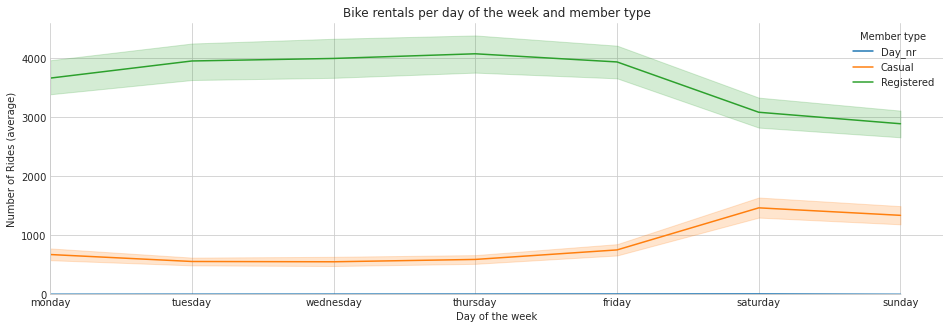

In [39]:
# Number of casual and registered riders according to weekday with value span
data_preproc = pd.DataFrame({'Day_nr': daily["weekday"], 'Day': daily["weekday_name"], 'Casual': daily["casual"], 'Registered': daily["registered"]})

plt.figure(figsize=(16,5))#, dpi=128)
sb.set_style("whitegrid")
sb.lineplot(x='Day', y='value', hue='variable', data=pd.melt(data_preproc, ['Day']))

plt.title('Bike rentals per day of the week and member type')
plt.ylabel('Number of Rides (average)')
plt.xlabel('Day of the week')
plt.legend(title='Member type', loc='upper right')
sb.despine(trim=True)
plt.xlim(0)
plt.ylim(0)
plt.savefig('graphs/dow_numrides_avg_membertype.jpg', bbox_inches='tight')
plt.show()

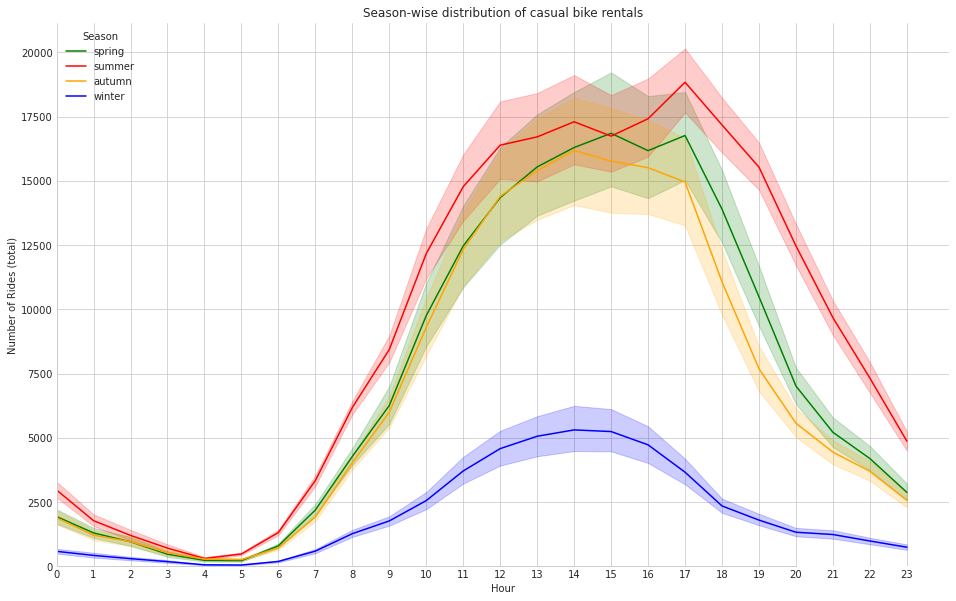

In [49]:
# Riders per hour grouped by season

Hour = hourly['date_time'].dt.hour

palette = ['green', 'red', 'orange', 'blue']
plt.figure(figsize=(16,10))#, dpi=128)
sb.set_style("whitegrid")
sb.lineplot(x=Hour, y='total_riders', hue='season_name', data=hourly, estimator=sum, palette=palette)
#sb.lineplot(x=Hour, y='registered', hue='season_name', data=hourly, estimator=sum, palette=palette)
#sb.lineplot(x=Hour, y='casual', hue='season_name', data=hourly, estimator=sum, palette=palette)

plt.title('Season-wise distribution of total bike rentals')
plt.ylabel('Number of Rides (total)')
plt.xlabel('Hour')
plt.legend(title='Season', loc='upper left', )
sb.despine(trim=True)
plt.xlim(0)
plt.ylim(0)
plt.xticks(np.arange(min(Hour), max(Hour) + 1, 1.0))
plt.savefig('graphs/hour_numrides_total_season.jpg', bbox_inches='tight')
plt.show()

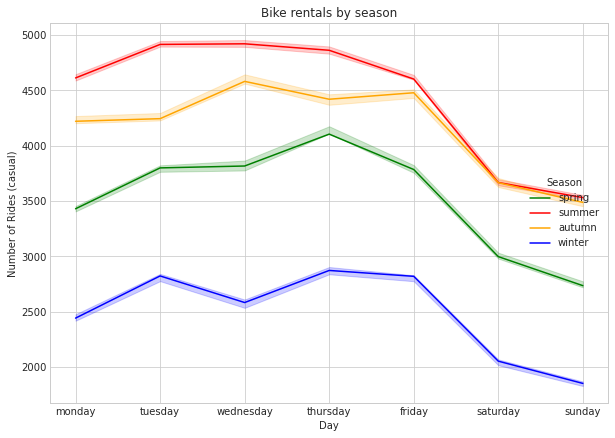

In [63]:
# Number of riders per day of the week, grouped by seasons
plt.figure(figsize = (10,7))
lp = sb.lineplot(x = 'weekday_name', y = 'total_riders', data = daily, hue = 'season_name', err_style = 'band', ci = 10, palette=palette)
#lp = sb.lineplot(x = 'weekday_name', y = 'registered', data = daily, hue = 'season_name', err_style = 'band', ci = 10, palette=palette)
#lp = sb.lineplot(x = 'weekday_name', y = 'casual', data = daily, hue = 'season_name', err_style = 'band', ci = 10, palette=palette)
lp.legend(loc = 'upper right', bbox_to_anchor = (1.4,1))
plt.title('Average number of registered users by day')
plt.title('Bike rentals by season')
plt.ylabel('Number of Rides (total)')
plt.xlabel('Day')
plt.legend(title = 'Season', loc = 'center right')
plt.savefig('graphs/dow_numrides_total_season.jpg', bbox_inches='tight')

plt.show()

There is an uptick in spring, summer, and a small uptick in autumn for casual riders at the evening rush hour but not the morning rush hour

Many casual riders around midday

Number of riders varies strongly


Very constant numbers

High spikes at the morning and evening rush hours and a bump at midday

Evening rush hour is much higher -> arrive sweaty at home and not the office

<hr>

In [84]:
hourly.head(2)

,date_time,instant,date_day,season,year,month,hour,is_holiday,weekday,is_workday,...,total_riders,hour_time,season_name,weekday_name,weather_desc,daytime,daytime_code,cold,hot,muggy
0,2011-01-01 00:00:00,1,2011-01-01,1,2011,1,0,0,6,0,...,16,00:00:00,winter,saturday,clear,night,0,1,0,1
1,2011-01-01 01:00:00,2,2011-01-01,1,2011,1,1,0,6,0,...,40,01:00:00,winter,saturday,clear,night,0,1,0,1


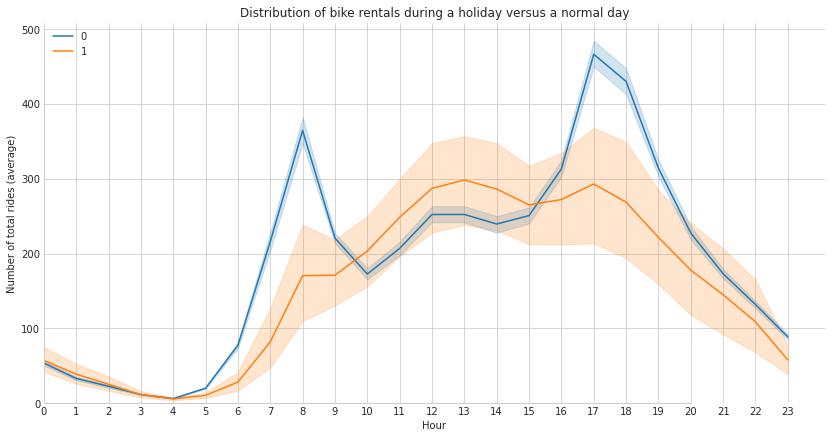

In [102]:
# Riders per hour on a holiday vs not-holiday
Hour = hourly["date_time"].dt.hour

sb.set_style("whitegrid")
plt.figure(figsize = (14,7))
sb.lineplot(x=Hour, y='total_riders', hue='is_holiday', data=hourly)

plt.title('Distribution of bike rentals during a holiday versus a normal day')
plt.ylabel('Number of total rides (average)')
plt.xlabel('Hour')
sb.despine(trim=True)
plt.xlim(0)
plt.ylim(0)
plt.xticks(np.arange(min(Hour), max(Hour) + 1, 1.0))

# When giving the labels an alternative text the colours change => TODO
plt.legend(title=None, loc='upper left')#, labels=['Not a holiday', 'Holiday']

plt.savefig('graphs/hour_numrides_total_holiday.jpg', bbox_inches='tight')
plt.show()

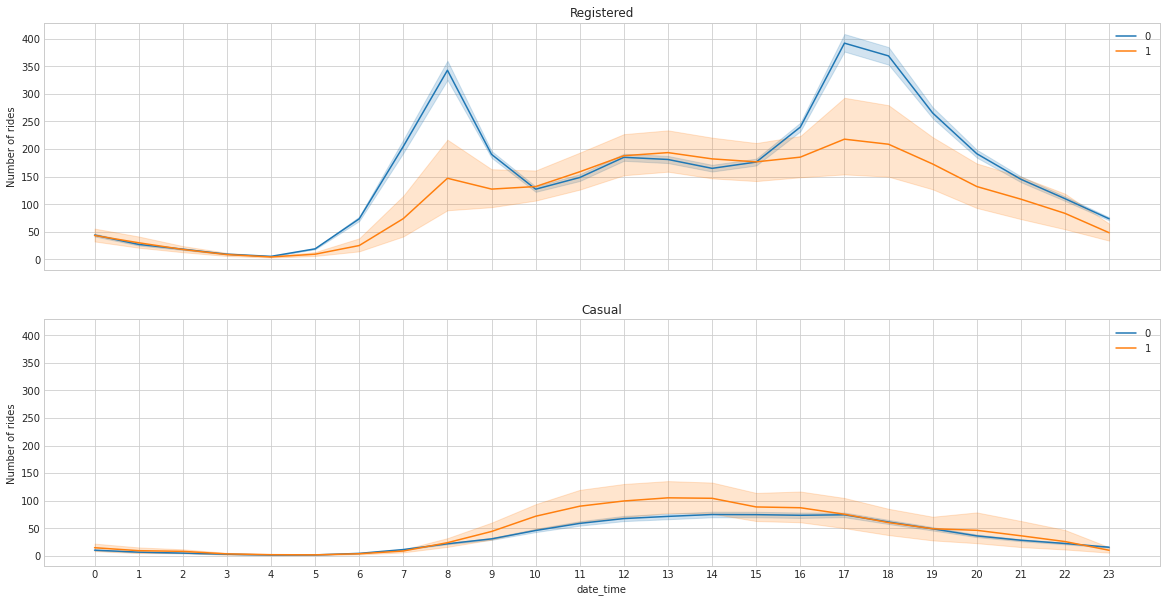

In [119]:
# Riders per hour on a holiday vs not-holiday
Hour = hourly["date_time"].dt.hour

fig, ax = plt.subplots(2,1, figsize = (20,10), sharey = True, sharex = True)

sb.lineplot(x = Hour, y = 'registered', hue='is_holiday', data = hourly, ax = ax[0])
ax[0].set_title('Registered')
ax[0].set_ylabel('Number of rides')
ax[0].legend()

sb.lineplot(x = Hour, y = 'casual', hue = 'is_holiday', data = hourly, ax = ax[1])
ax[1].set_title('Casual')
ax[1].set_ylabel('Number of rides')
ax[1].legend()

plt.xticks(np.arange(min(Hour), max(Hour) + 1, 1.0))

sb.set_style("whitegrid")

# When giving the labels an alternative text the colours change => TODO
#plt.legend(title=None, loc='upper left')#, labels=['Not a holiday', 'Holiday']

plt.savefig('graphs/hour_numrides_ridertypes_holiday.jpg', bbox_inches='tight')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


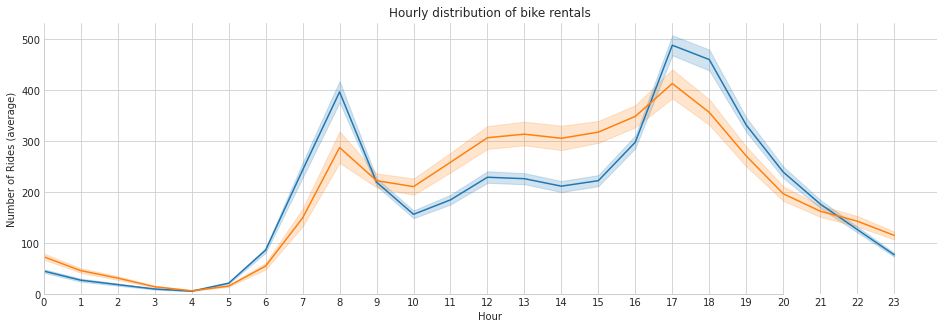

In [125]:
# Riders per hour on a not-holiday grouped by weekday vs weekend
Hour = hourly["date_time"].dt.hour

#weekday = hourly.loc[(hourly.weekday_name.isin(['monday', 'tuesday', 'wednesday', 'thursday', 'friday'])) & (hourly.is_holiday == 0)]
#weekend = hourly.loc[hourly.weekday_name.isin(['saturday', 'sunday'])]
weekday = hourly.loc[(hourly.weekday < 5) & (hourly.is_holiday == 0)]
weekend = hourly.loc[(hourly.weekday >= 5)]

plt.figure(figsize=(16,5))#, dpi=128)
sb.set_style("whitegrid")
s1 = sb.lineplot(x = Hour, y = 'total_riders', data = weekday)
s2 = sb.lineplot(x = Hour, y = 'total_riders', data = weekend)
# s1 = sb.lineplot(x=Hour, y='registered', data=weekday)
# s2 = sb.lineplot(x=Hour, y='registered', data=weekend)
# s1 = sb.lineplot(x=Hour, y='casual', data=weekday)
# s2 = sb.lineplot(x=Hour, y='casual', data=weekend)
plt.title('Hourly distribution of bike rentals')
plt.ylabel('Number of Rides (average)')
plt.xlabel('Hour')
plt.legend(title=None, loc='upper left')#, labels=["Weekday", "Weekend"])
sb.despine(trim=True)
plt.xlim(0)
plt.ylim(0)
plt.xticks(np.arange(min(Hour), max(Hour) + 1, 1.0))
plt.show()

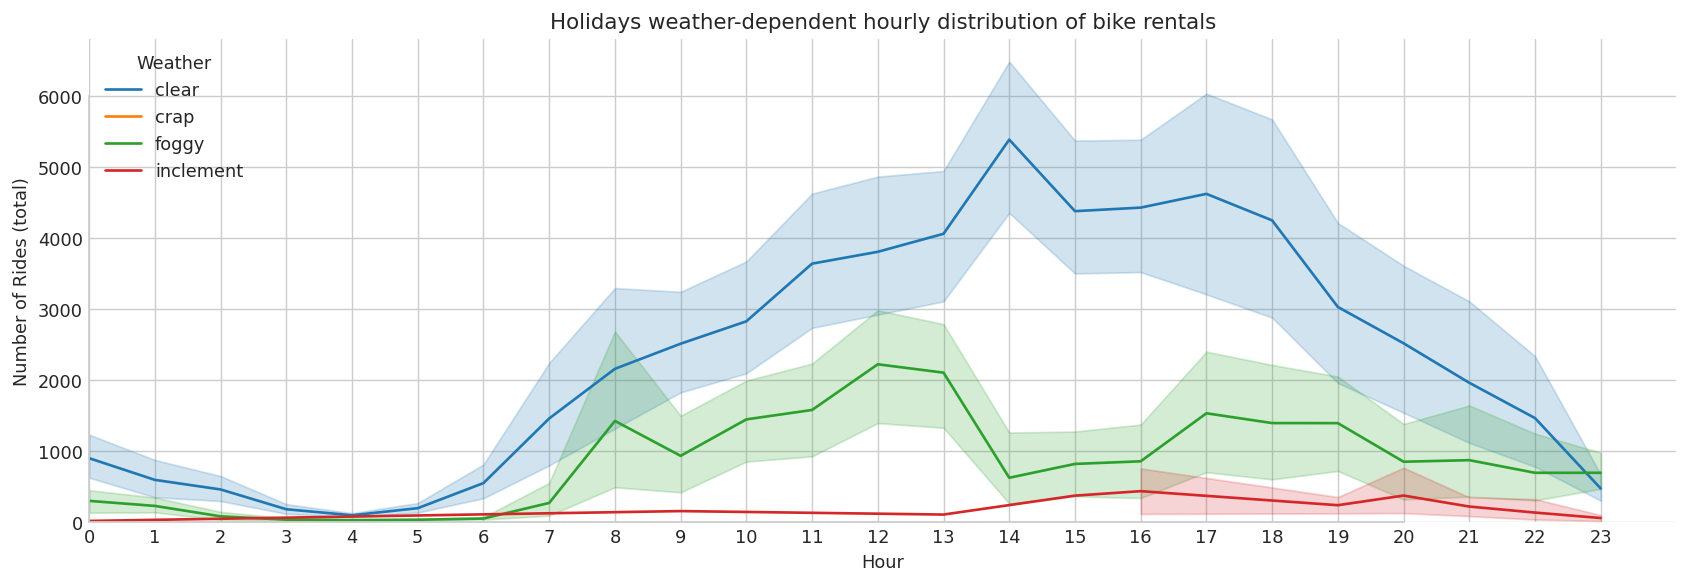

In [31]:
# Riders per hour on a holiday grouped by weather
Hour = hourly["date_time"].dt.hour
Holiday_hourly = hourly[hourly.is_holiday == "yes"]

plt.figure(figsize=(16,5), dpi=128)
sb.set_style("whitegrid")
sb.lineplot(x=Hour, y='total_riders', hue='weather_desc', data=Holiday_hourly, estimator=sum)
#sb.lineplot(x=Hour, y='registered', hue='weather_desc', data=Holiday_hourly, estimator=sum)
#sb.lineplot(x=Hour, y='casual', hue='weather_desc', data=Holiday_hourly, estimator=sum)

plt.title('Holidays weather-dependent hourly distribution of bike rentals')
plt.ylabel('Number of Rides (total)')
plt.xlabel('Hour')
plt.legend(title="Weather", loc='upper left')
sb.despine(trim=True)
plt.xlim(0)
plt.ylim(0)
plt.xticks(np.arange(min(Hour), max(Hour) + 1, 1.0))
plt.show()

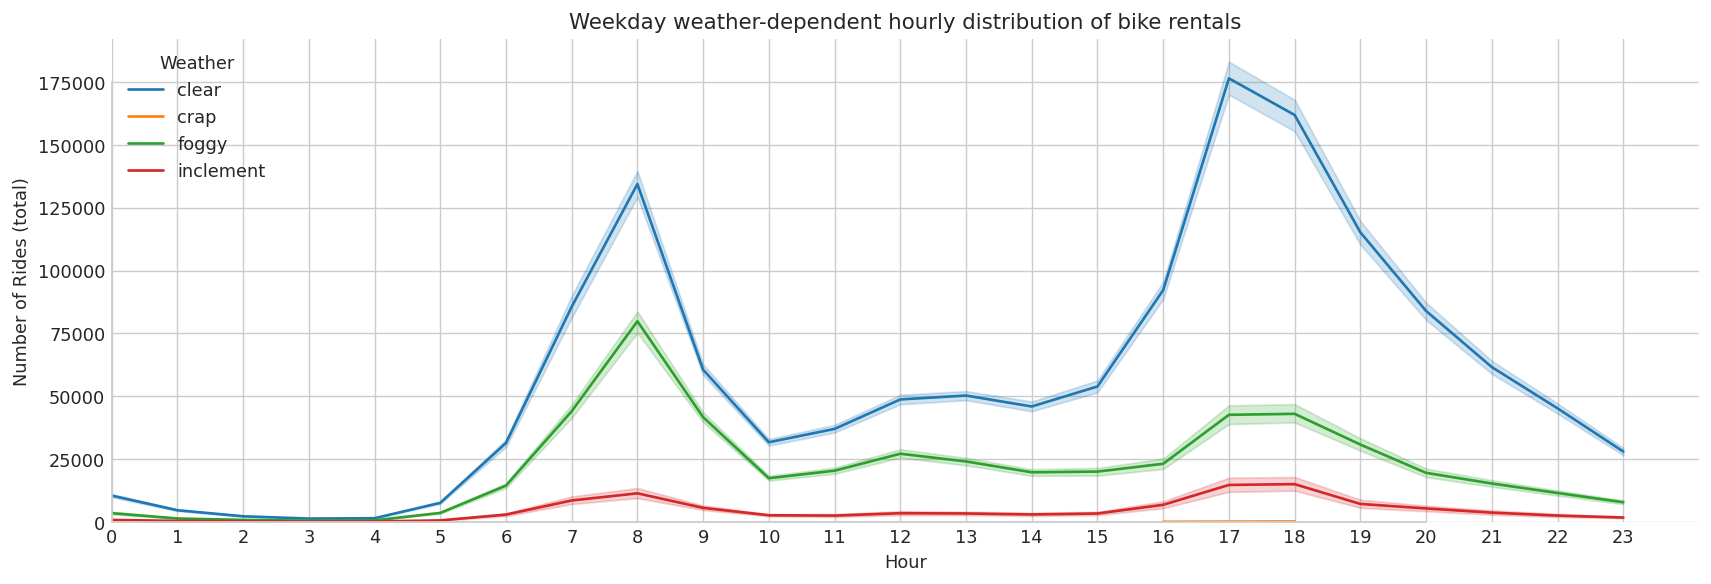

In [34]:
# Riders per hour on the weekday grouped by weather
Hour = hourly["date_time"].dt.hour

plt.figure(figsize=(16,5), dpi=128)
sb.set_style("whitegrid")
sb.lineplot(x=Hour, y='total_riders', hue='weather_desc', data=weekday, estimator=sum)
#sb.lineplot(x=Hour, y='registered', hue='weather_desc', data=weekday, estimator=sum)
#sb.lineplot(x=Hour, y='casual', hue='weather_desc', data=weekday, estimator=sum)

plt.title('Weekday weather-dependent hourly distribution of bike rentals')
plt.ylabel('Number of Rides (total)')
plt.xlabel('Hour')
plt.legend(title="Weather", loc='upper left')
sb.despine(trim=True)
plt.xlim(0)
plt.ylim(0)
plt.xticks(np.arange(min(Hour), max(Hour) + 1, 1.0))
plt.show()

In [33]:
badweather = hourly[hourly.weather_desc == 'crap']
badweather

,date_time,date_day,season,year,month,hour,is_holiday,weekday,weather,temp,temp_feel,humidity,windspeed,casual,registered,total_riders,weather_desc,daytime
585,2011-01-26 16:00:00,2011-01-26,winter,2011,1,2022-03-23 16:00:00,no,wednesday,4,2.34,-2.9980,93.0,22.0028,1,35,36,crap,afternoon
8854,2012-01-09 18:00:00,2012-01-09,winter,2012,1,2022-03-23 18:00:00,no,monday,4,1.40,-0.9982,86.0,6.0032,6,158,164,crap,afternoon
9123,2012-01-21 01:00:00,2012-01-21,winter,2012,1,2022-03-23 01:00:00,no,saturday,4,-1.42,-6.9976,86.0,12.9980,1,22,23,crap,night


In [ ]:
# Riders per hour on the weekend grouped by weather
Hour = hourly["date_time"].dt.hour

plt.figure(figsize=(16,5), dpi=128)
sb.set_style("whitegrid")
sb.lineplot(x=Hour, y='total_riders', hue='weather_desc', data=weekend, estimator=sum)
#sb.lineplot(x=Hour, y='registered', hue='weather_desc', data=weekend, estimator=sum)
#sb.lineplot(x=Hour, y='casual', hue='weather_desc', data=weekend, estimator=sum)

plt.title('Weekday weather-dependent hourly distribution of bike rentals')
plt.ylabel('Number of Rides (total)')
plt.xlabel('Hour')
plt.legend(title="Weather", loc='upper left')
sb.despine(trim=True)
plt.xlim(0)
plt.ylim(0)
plt.xticks(np.arange(min(Hour), max(Hour) + 1, 1.0))
plt.show()

<hr>

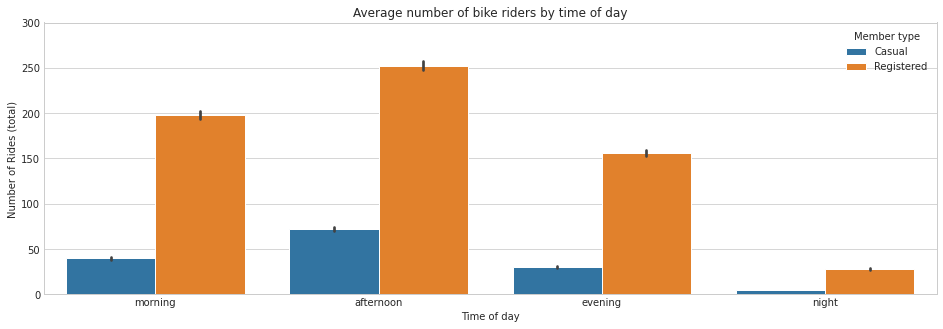

In [40]:
# Average of casual and registered riders by daytime
# night: 0-6, morning: 7-11, afternoon: 12-17, evening: 18-23

data_preproc = pd.DataFrame({'Daytime': hourly["daytime"], 'Casual': hourly["casual"], 'Registered': hourly["registered"]})

plt.figure(figsize=(16,5))#, dpi=128)
sb.set_style("whitegrid")
sb.barplot(x='Daytime', y='value', hue='variable', data=pd.melt(data_preproc, ['Daytime']), estimator=average, order=['morning', 'afternoon', 'evening', 'night'])

plt.title('Average number of bike riders by time of day')
plt.ylabel('Number of Rides (total)')
plt.xlabel('Time of day')
plt.legend(title='Member type', loc='upper right')
plt.ylim(0, 300)
plt.show()

<hr>

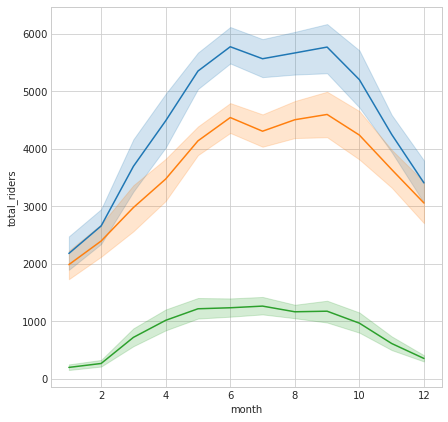

In [89]:
plt.figure(figsize = (7,7))
sb.lineplot(x = 'month', y = 'total_riders', data = daily)
sb.lineplot(x = 'month', y = 'registered', data = daily)
sb.lineplot(x = 'month', y = 'casual', data = daily)

plt.show()


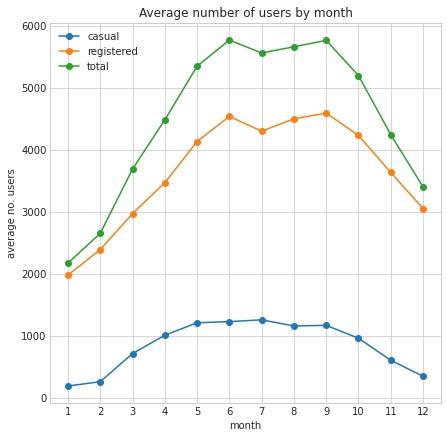

In [90]:
# mean no. users per month
users_per_month = daily.groupby('month').agg({'casual':'mean', 'registered':'mean', 'total_riders':'mean'}).round().reindex(list(range(1,13)))

plt.figure(figsize = (7,7))
plt.title('Average number of users by month')
plt.plot(users_per_month.index, users_per_month['casual'], label = 'casual', marker = 'o')
plt.plot(users_per_month.index, users_per_month['registered'], label = 'registered', marker = 'o')
plt.plot(users_per_month.index, users_per_month['total_riders'], label = 'total', marker = 'o')
plt.xticks(ticks = users_per_month.index)
plt.xlabel ('month')
plt.ylabel ('average no. users')
plt.legend()
plt.show()

In [94]:
daily.head(2)

,date_time,instant,date_day,season,year,month,is_holiday,weekday,is_workday,weather,...,casual,registered,total_riders,season_name,weekday_name,weather_desc,date_int,cold,hot,muggy
0,2011-01-01,1,2011-01-01,1,2011,1,0,6,0,2,...,331,654,985,winter,saturday,foggy,2011-01-01,0,0,1
1,2011-01-02,2,2011-01-02,1,2011,1,0,0,0,2,...,131,670,801,winter,sunday,foggy,2011-01-02,0,0,1


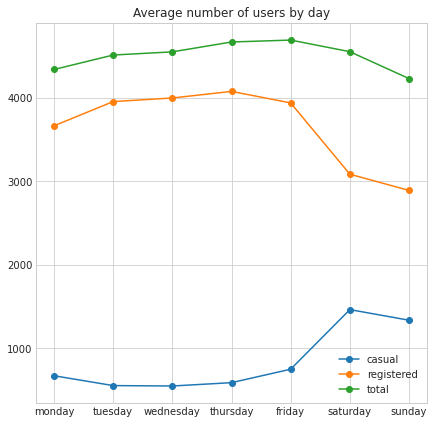

In [95]:
# users per day of week
users_per_DoW = daily.groupby('weekday_name').agg({'casual':'mean', 'registered':'mean', 'total_riders':'mean'}).round()
users_per_DoW = users_per_DoW.reindex(['monday', 'tuesday', 'wednesday','thursday', 'friday', 'saturday', 'sunday'])

plt.figure(figsize = (7,7))
plt.title('Average number of users by day')
plt.plot(users_per_DoW.index, users_per_DoW['casual'], label = 'casual', marker = 'o')
plt.plot(users_per_DoW.index, users_per_DoW['registered'], label = 'registered', marker = 'o')
plt.plot(users_per_DoW.index, users_per_DoW['total_riders'], label = 'total', marker = 'o')
plt.legend()
plt.show()